# Лабораторная 4 Югай Ильи AIN-1-21

In [28]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

digits = load_digits()


### Изучение данных

In [29]:
# Посмотрим на данные и их описание
print(digits.DESCR)

# Создадим DataFrame для анализа
data = pd.DataFrame(digits.data)

# Посмотрим на первые несколько строк данных
data.head()

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Разделение данных на обучающий и тестовые наборы


In [30]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Исследование данных с помощью визуализации
Для визуализации данных в данном случае мы можем построить изображения рукописных цифр. Каждая точка данных в этом датасете представляет собой пиксель изображения 8x8.

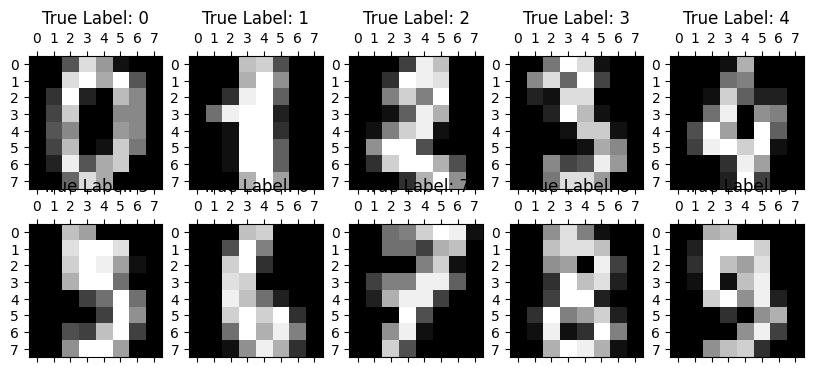

In [31]:
# Визуализация нескольких изображений
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
plt.gray()

for i, ax in enumerate(axes.flat):
    ax.matshow(digits.images[i])
    ax.set_title(f"True Label: {digits.target[i]}")

plt.show()

### Построение модели k-ближайших соседей
Для построения модели k-ближайших соседей используем библиотеку 'KNeighborsClassifier':

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Создание модели
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение модели на обучающих данных
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Прогноз модели
Теперь мы можем сделать прогнозы на тестовых данных:

In [33]:
y_pred = knn.predict(X_test)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

### Оценка качества модели
Давайте оценим качество модели, вычислив метрики классификации, такие как точность, полнота и F1-мера.

In [34]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### График распределения классов
Давайте посмотрим на распределение классов в датасете:

C:\Users\for_i\AppData\Local\Temp\ipykernel_19828\3480891655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y, palette="Set3")


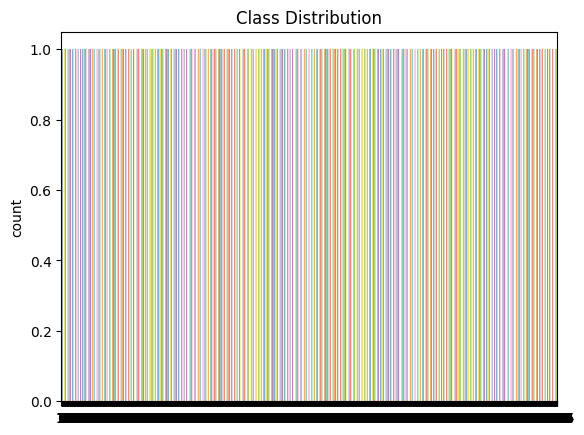

In [35]:
import seaborn as sns

sns.countplot(y, palette="Set3")
plt.title("Class Distribution")
plt.show()

### Матрица ошибок
После получения прогнозов модели, можно построить матрицу ошибок для оценки производительности модели:

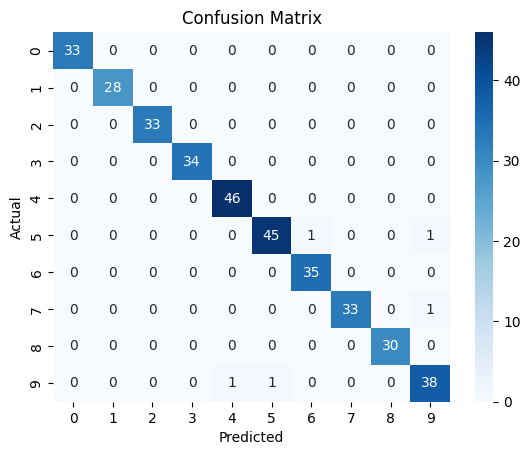

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Кривая обучения
Можно также построить кривую обучения, чтобы оценить, как изменение количества соседей влияет на качество модели:

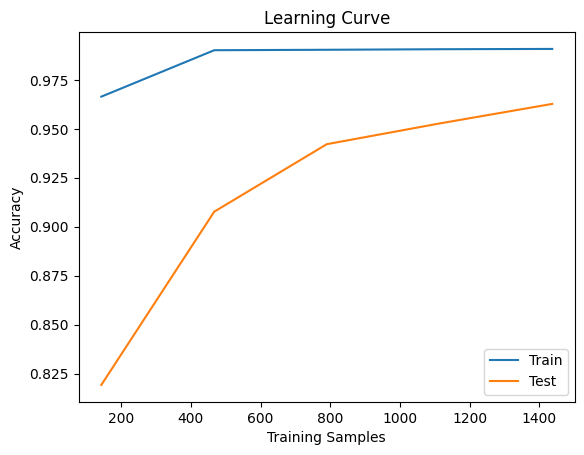

In [37]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Вывод
Модель k-ближайших соседей показала отличное качество при классификации рукописных цифр. Визуализация данных и метрики производительности подтверждают это. Модель подходит для задачи распознавания рукописных цифр.